In [1]:
import sys
sys.path.insert(0, "/work/ml_pipeline/regression_models/")

import numpy as np
import pandas as pd
from regression_models.processing.data_management import load_pipeline
from regression_models.config import config
#from regression_models.processing.validation import validate_inputs
from regression_models import __version__ as _version
from processing.data_management import load_dataset, save_pipeline
from sklearn.model_selection import train_test_split
from processing import preprocessors as pp
import glob
import logging
import typing as t

data = load_dataset(file_name=config.TRAINING_DATA_FILE)

# divide train and test
X_train, X_test, y_train, y_test = train_test_split(
        data[config.FEATURES], data[config.TARGET], test_size=0.1, random_state=0) 

VERSION_PATH: /work/ml_pipeline/regression_models/regression_models/VERSION
VERSION: "0.1.0"


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#https://datascience.stackexchange.com/questions/48026/how-to-correctly-apply-the-same-data-transformation-used-on-the-training-datas

loaded_models = [load_pipeline(file_name=i.split("/")[-1]) for i in glob.glob("trained_models/*")]

In [3]:
predictions = []

for model in loaded_models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

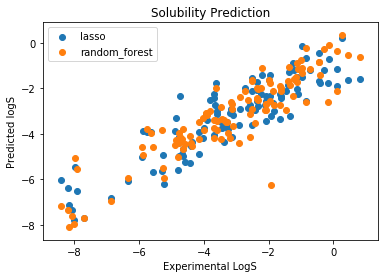

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
# 乱数を生成
for y_pred, name in zip(predictions, ["lasso", "random_forest"]):
    plt.scatter(y_test,y_pred, label=name)
    plt.title("Solubility Prediction")
    plt.xlabel("Experimental LogS")
    plt.ylabel("Predicted logS")
    plt.legend()